# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

# Data Preparation


In [7]:
df = pd.read_csv("bank-additional-full.csv",sep=';',na_values='unknown')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.shape

(41188, 21)

**Handling Missing Values**

In [10]:
df.isna().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [11]:
null_columns = ['job', 'education', 'default', 'housing', 'loan', 'marital']
for col in null_columns:
    df[col] = df[col].fillna(df[col].mode().values[0])

In [12]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [13]:
df.duplicated().sum()

14

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,258.323627,2.567956,962.463035,0.173022,0.081865,93.575713,-40.503070,3.621231,5167.032805
std,10.420578,259.309058,2.770364,186.941469,0.494975,1.570899,0.578849,4.627877,1.734456,72.252395
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Detect Outliers for Numerical Columns**

Text(0.5, 1.0, 'Age Outliers')

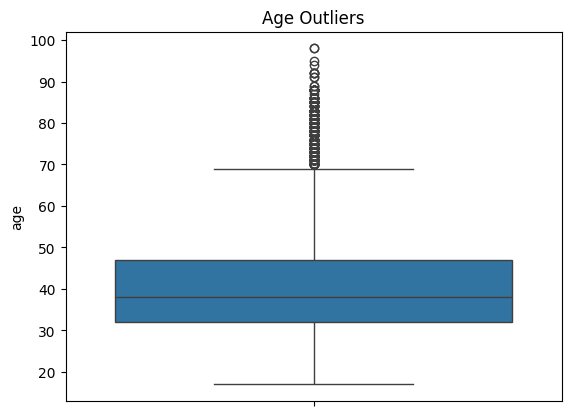

In [16]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

In [17]:
# Handle Outliers
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap the outliers
df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Text(0.5, 1.0, 'Age Outliers')

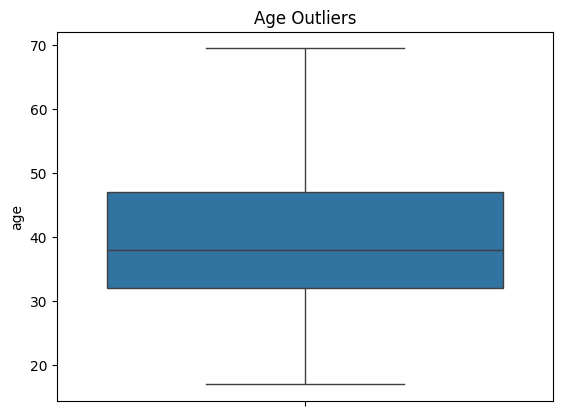

In [18]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

Text(0.5, 1.0, 'Duration Outliers')

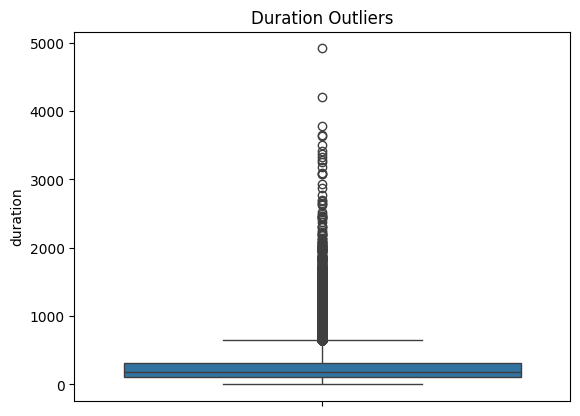

In [19]:
sns.boxplot(y = 'duration' , data=df)
plt.title('Duration Outliers')

In [20]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap the outliers
df['duration'] = np.where(df['duration'] < lower_bound, lower_bound, df['duration'])
df['duration'] = np.where(df['duration'] > upper_bound, upper_bound, df['duration'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Text(0.5, 1.0, 'Duration Outliers')

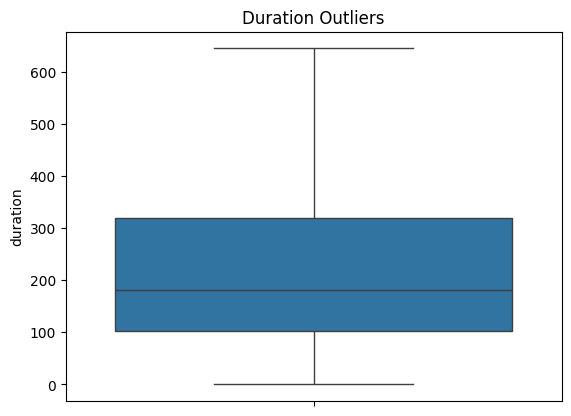

In [21]:
sns.boxplot(y = 'duration' , data=df)
plt.title('Duration Outliers')

# Exploratory Data Analysis


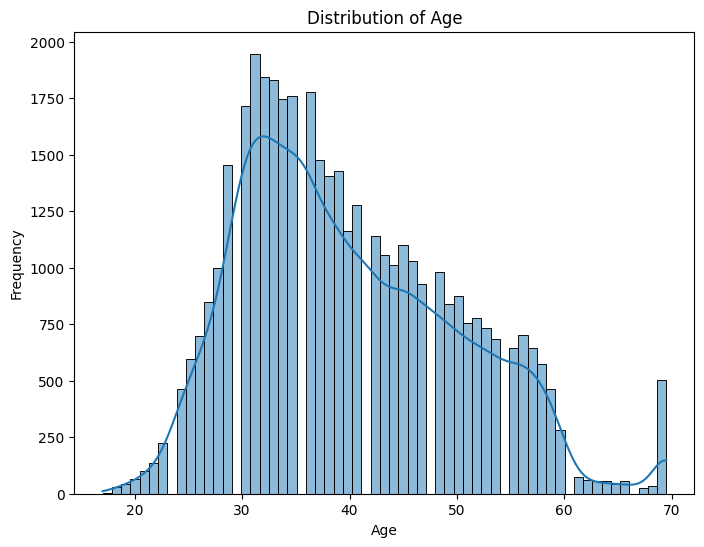

In [22]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

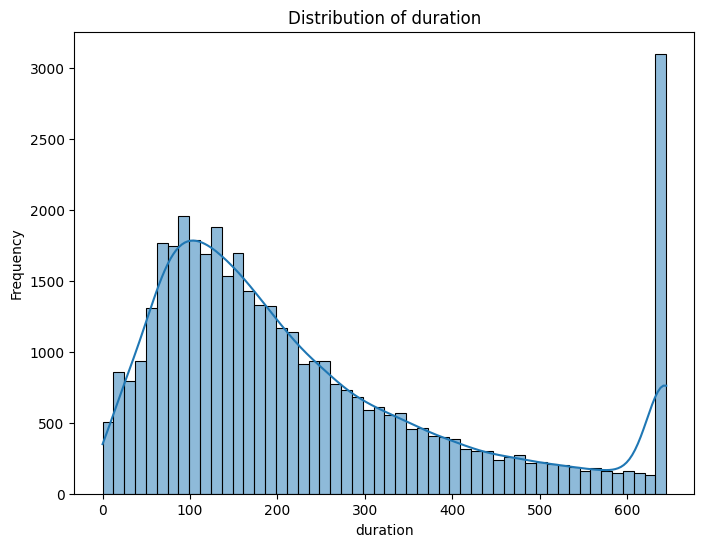

In [23]:
# Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], kde=True)
plt.title('Distribution of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'jobs Distribution')

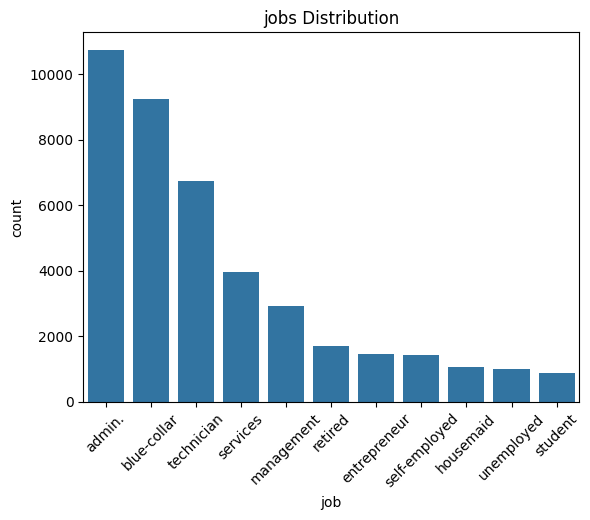

In [24]:
# Job Distribution
sns.countplot(data=df,x='job',order = df['job'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("jobs Distribution")

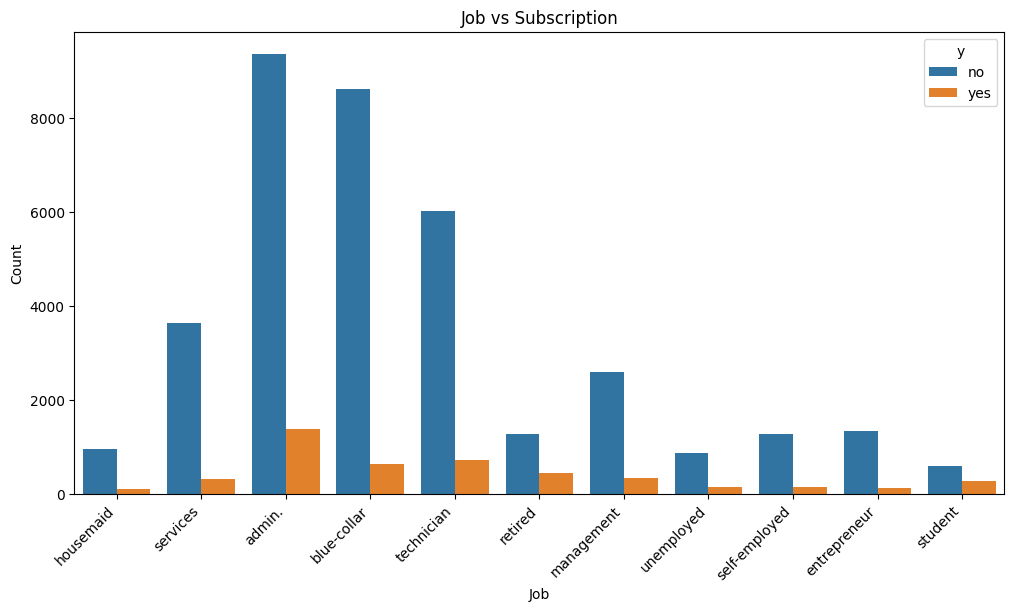

In [25]:
# bar plot of job vs subscribed
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job vs Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

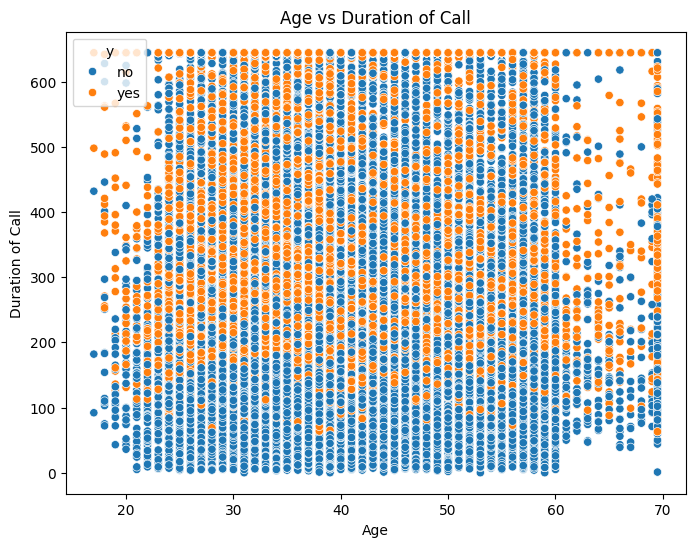

In [26]:
# Scatter plot of age vs duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Age vs Duration of Call')
plt.xlabel('Age')
plt.ylabel('Duration of Call')
plt.show()

In [27]:
# 3D Scatter Plot (Example: age, duration, campaign)
fig = px.scatter_3d(df, x='age', y='duration', z='campaign', color='y',
                    title='Age, Duration, Campaign and Subscription')
fig.show()

In [28]:
# Parallel Coordinates Plot (Example: multiple numerical features)
fig = px.parallel_coordinates(df, dimensions=['age', 'duration', 'campaign', 'pdays', 'previous'],
                              title='Parallel Coordinates Plot of Selected Features')
fig.show()

<Axes: xlabel='y', ylabel='count'>

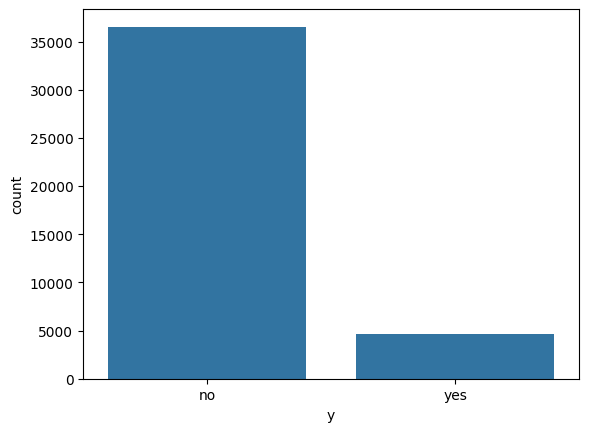

In [29]:
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)

# Preprocessing Neural Network

In [30]:
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [31]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [32]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [33]:
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [34]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,5,1,5,0,1,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46.0,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56.0,5,1,6,0,1,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44.0,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


**Data Splitting**

In [35]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Scaling**


In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Neural Network Model

In [37]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = x_train.shape[1])) # first layer
model.add(Dense(units=8, activation='relu'))  # second layer
model.add(Dense(units=1, activation='sigmoid')) # final layer

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluation


In [40]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8711 - loss: 9.7991 - val_accuracy: 0.6770 - val_loss: 0.8149
Epoch 2/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8809 - loss: 0.4233 - val_accuracy: 0.8913 - val_loss: 0.6787
Epoch 3/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8815 - loss: 0.3837 - val_accuracy: 0.8227 - val_loss: 0.4480
Epoch 4/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8894 - loss: 0.3230 - val_accuracy: 0.8989 - val_loss: 0.2813
Epoch 5/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8929 - loss: 0.3314 - val_accuracy: 0.8223 - val_loss: 0.4634
Epoch 6/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8891 - loss: 0.3073 - val_accuracy: 0.8570 - val_loss: 0.3438
Epoch 7/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8812 - loss: 0.3484 - val_accuracy: 0.8939 - val_loss: 0.3714
Epoch 8/10
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8809 - loss: 0.3809 - val_accuracy: 0.

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.3929
Test Accuracy: 89.12%


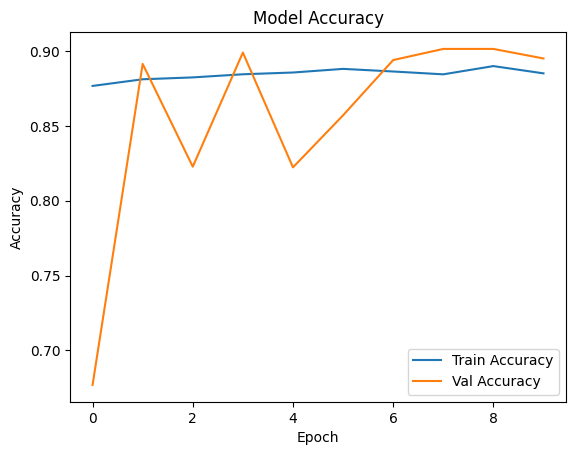

In [42]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()